<a href="https://colab.research.google.com/github/carlibeisel/Drains_Lower_Boise_River/blob/main/*irrigation_mileage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created by Carli Beisel


Purpose:
1. Finds the proportion of irrigation mileage to area of drainshed.
2. Scales irrigation system mileage and proporiton metric for each drainshed.

All initial geoprocessing was done in GIS to obtain irrigation mileage and area for each drainshed.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#---------------------#
#    Import File      #
#---------------------#

df = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_management_metric/irrigation_mileage.csv')

In [ ]:
#-------------------------------------------------------------------#
#        Proportion of Irrigation Canals to Subdrainage Area        #
#-------------------------------------------------------------------#
df['Proportion'] = df['Total Miles'] / df['Area (mi^2)']

In [ ]:
df

,Drainage,Total Miles,Area (mi^2),Proportion
0,West Hartley,24.699237,27.197264,0.908152
1,Sand Run Gulch,236.987350,90.093133,2.630471
2,Eagle Drain,24.955120,13.835230,1.803737
3,Mason Slough,12.198954,1.515643,8.048699
4,Mason Creek,373.629153,61.089775,6.116067
5,East Hartley Drain,67.579256,18.622051,3.628991
6,Willow Creek,59.074853,84.777672,0.696821
7,Conway Gulch,43.238753,12.324082,3.508477
8,Thurman Drain,9.497727,3.832341,2.478309
9,North Middleton,55.017386,28.293101,1.944551


In [ ]:
#----------------------------------#
#   Scale Mileage & Proportion     #
#----------------------------------#
#irrigation mileage
mean_mileage = df['Total Miles'].mean()
std_dev_mileage = df['Total Miles'].std()
df['miles_scaled'] = (df['Total Miles'] - mean_mileage) / std_dev_mileage ** 2


#proportion of irrigation mileage to area of drainshed
mean_prop = df['Proportion'].mean()
std_dev_prop = df['Proportion'].std()
df['prop_scaled'] = (df['Proportion'] - mean_prop) / std_dev_prop ** 2

df = df.reset_index(drop=True)
df.to_csv('/content/drive/MyDrive/Data/Model Modifications/water_management_metric/irrigation_mileage_scaled.csv', index=False)

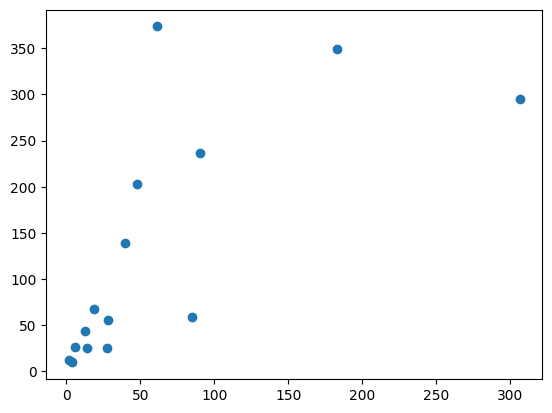

In [6]:
#----------------------------------#
# Figure Comparing Drain Mileage   #
#----------------------------------#

df = pd.read_csv('/content/drive/MyDrive/Data/Model Modifications/water_management_metric/irrigation_mileage_scaled.csv')

plt.scatter(x=df["Area (mi^2)"], y=df["Total Miles"])
